In [3]:
%load_ext autoreload
%autoreload 2
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import processing_netcdf as pcdf
import geopandas as gpd
from geopandas import GeoDataFrame
import shapely.geometry 
import numpy as np
from shapely import geometry as gmty
from geofeather import to_geofeather, from_geofeather
import glob
import os
import pyarrow
from xclim import ensembles as ens
from xclim import subset
import matplotlib.pyplot as plt

In [4]:
folder = "/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/"

# Select and open Region (Shapefile)

In [1]:
######Select Region by uncommenting
region = 'DDE_STF_20K_REG_FOR_VUE_S'
# region = 'DDE_STF_20K_UA_PER_VUE_S'
# region = 'DOM_BIO'
# region = 'REG_ECO'
# region = 'SDOM_BIO'
# region = 'Secteurs_Operations_Regionales'
# region = 'SREG_ECO'
# region = 'territoire_guide

In [5]:
shapefile = ("/home/mlopez/EXEC/Shapefiles/"+region+".shp")
poly = gpd.read_file(shapefile)
poly= poly.to_crs('epsg:4326')
poly

,OBJECTID,NO_REG_FOR,NM_REG_FOR,NO_UG_RAF,SUP_KM2,DATE_PUBLI,Shape_Leng,Shape_Area,D_GENERAL,geometry
0,1,01,BAS-SAINT-LAURENT,"011, 012",27645.7,2019-11-30,1.018112e+06,2.743725e+10,Sud-est,"POLYGON ((-68.24266 48.85438, -68.18955 48.875..."
1,2,02,SAGUENAY -LAC-SAINT-JEAN,"023, 024, 025, 027",102315.5,2019-11-30,2.642611e+06,1.011782e+11,Nord-est,"POLYGON ((-71.02818 52.21282, -71.02784 52.213..."
2,3,03,CAPITALE-NATIONALE-CHAUDIÈRE-APPALACHES,"035, 037",35573.9,2019-11-30,1.295862e+06,3.544054e+10,Centre du Québec,"POLYGON ((-70.24926 46.12110, -70.24936 46.120..."
3,4,04,MAURICIE-CENTRE-DU-QUÉBEC,"041, 042",52443.7,2019-11-30,1.903121e+06,5.216317e+10,Centre du Québec,"POLYGON ((-72.70529 45.75959, -72.70536 45.759..."
4,5,05,ESTRIE-MONTÉRÉGIE-LAVAL-MONTRÉAL,"051, 052",23252.3,2019-11-30,1.123268e+06,2.330905e+10,Secteur métropolitain et sud,"POLYGON ((-72.27288 45.61310, -72.27288 45.613..."
5,6,07,OUTAOUAIS,"071, 072, 073, 074",39030.0,2019-11-30,1.677902e+06,3.893718e+10,Sud-ouest,"POLYGON ((-74.72535 45.85802, -74.72646 45.852..."
6,7,08,ABITIBI-TEMISCAMINGUE,"081, 082, 083, 084, 085, 086",57124.2,2019-11-30,1.961835e+06,5.674050e+10,Nord-ouest,"POLYGON ((-77.86075 46.21053, -77.86104 46.210..."
7,8,09,COTE-NORD,"093, 094, 097",379435.8,2019-11-30,5.360494e+06,3.744732e+11,Nord-est,"POLYGON ((-70.02990 52.89020, -67.32805 52.884..."
8,9,10,NORD-DU-QUEBEC,"102, 105, 106, 107",0.1,2019-11-30,1.858192e+03,1.456492e+05,Nord-ouest,"POLYGON ((-78.76555 48.69057, -78.76556 48.690..."
9,10,10,NORD-DU-QUEBEC,"102, 105, 106, 107",48.3,2019-11-30,3.542201e+04,4.789565e+07,Nord-ouest,"POLYGON ((-78.65906 48.69034, -78.66015 48.690..."


## Import dataframe with polygons

In [148]:
dfpolyshape = from_geofeather('Grid-DDE_STF_20K_REG_FOR_VUE_S.feather')

  warnings.warn(



In [149]:
dfpolyshape

,lat,lon,TER_GUIDE,geometry
0,52.957191,-67.712730,6opqr,"POLYGON ((-67.67107 52.93424, -67.67107 52.915..."
1,52.957191,-67.629402,6opqr,"POLYGON ((-67.67107 52.91553, -67.67107 52.934..."
2,52.957191,-67.546066,6opqr,"POLYGON ((-67.56730 52.91553, -67.57974 52.915..."
3,52.873859,-67.796059,6opqr,"POLYGON ((-67.75439 52.89329, -67.75439 52.832..."
4,52.873859,-67.712730,6opqr,"POLYGON ((-67.75439 52.83219, -67.75439 52.893..."
...,...,...,...,...
33193,45.041668,-72.208336,2c,"POLYGON ((-72.25000 45.00450, -72.25000 45.083..."
33194,45.041668,-72.125000,2c,"POLYGON ((-72.16666 45.00508, -72.16666 45.083..."
33195,45.041668,-72.041672,2c,"POLYGON ((-72.08334 45.00564, -72.08334 45.083..."
33196,45.041668,-71.958336,2c,"POLYGON ((-72.00000 45.00667, -72.00000 45.083..."


# Select variable

In [5]:
files = glob.glob(folder+"*rcp85_tg_mean_annual.nc")
#ex: ACCESS1-3_rcp45_tn_mean_annual.nc
files



['/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/ACCESS1-3_rcp85_tg_mean_annual.nc',
 '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/BNU-ESM_rcp85_tg_mean_annual.nc',
 '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/CanESM2_rcp85_tg_mean_annual.nc',
 '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/CMCC-CMS_rcp85_tg_mean_annual.nc',
 '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/GFDL-ESM2M_rcp85_tg_mean_annual.nc',
 '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/HadGEM2-CC_rcp85_tg_mean_annual.nc',
 '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/INM-CM4_rcp85_tg_mean_annual.nc',
 '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/IPSL-CM5A-LR_rcp85_tg_mean_annual.nc',
 '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/IPSL-CM5B-LR_rcp85_tg_mean_annual.nc',
 '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/MPI-ESM-LR_rcp85_tg_mean_annual.nc',
 '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/NorESM1-M_rcp85_tg_mean_annual.nc']

# Open Mask if already created or create it. 

In [7]:
dsEns= ens.create_ensemble(files)
#dsEnsSeas = ens.create_ensemble(filesSeas)
dsEns
if os.path.exists(shapefile.replace('.shp','.nc')):
    mask = xr.open_dataset(shapefile.replace('.shp','.nc'))
    mask = mask.__xarray_dataarray_variable__
    
else:
    mask= subset.create_mask(poly=poly, x_dim=dsEns.lon, y_dim=dsEns.lat)
    mask = mask.T
    mask.to_netcdf(shapefile.replace('.shp','.nc'))

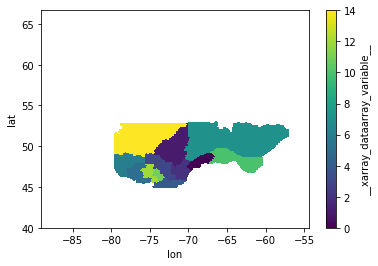

In [8]:
mask.plot()

# Subsetting arrays with Xclim

In [9]:
# Mapping data - 30 year means
tmp1 = dsEns.sel(time=(dsEns.time.dt.year>=1981))
window = 30
time1 = tmp1.time[0::window]

ds30yavg = tmp1.coarsen(time=window).mean()
ds30yavg['time'] = time1
perc30yavg = ens.ensemble_percentiles(ds30yavg)
perc30yavg # entire grid

# Mapping data

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 320, 416), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 320, 416), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 320, 416), meta=np.ndarray>

In [ ]:
# select data for individual regions
reg_ids = np.unique(mask.values)
reg_ids = reg_ids[np.where(~np.isnan(reg_ids))]
listRegions = []
for r in reg_ids:
    print(r)
    if ~np.isnan(r):
        reg = perc30yavg.where(mask==r, drop=True)
        print(reg)
        df = reg.drop('realization').to_dataframe().dropna()
        listRegions.append(df)
        # export ot netcdf?

0.0
<xarray.Dataset>
Dimensions:      (lat: 25, lon: 44, realization: 11, time: 4)
Coordinates:
  * lon          (lon) float32 -70.1293 -70.04597 ... -66.62944 -66.54611
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * lat          (lat) float32 49.12401 49.04068 48.95735 ... 47.20742 47.12409
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 25, 44), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 25, 44), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 25, 44), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



## Example for Region 1

In [146]:
Region1 = listRegions[1]
Region1i = Region1.reset_index()

In [147]:
Region1i

,lat,lon,time,tg_mean_p10,tg_mean_p50,tg_mean_p90,region
0,52.790531,-70.129303,1981-01-01,269.758575,269.859589,270.131927,1.0
1,52.790531,-70.129303,2011-01-01,270.621002,271.159241,271.937225,1.0
2,52.790531,-70.129303,2041-01-01,272.319489,273.171783,274.123016,1.0
3,52.790531,-70.129303,2071-01-01,273.499847,276.050201,277.139648,1.0
4,52.790531,-70.045967,1981-01-01,269.879547,269.979675,270.249695,1.0
...,...,...,...,...,...,...,...
7391,47.540741,-71.629242,2071-01-01,277.884979,279.666565,280.679321,1.0
7392,47.457409,-71.629242,1981-01-01,273.872894,273.953949,274.145111,1.0
7393,47.457409,-71.629242,2011-01-01,274.766602,275.260559,275.837372,1.0
7394,47.457409,-71.629242,2041-01-01,276.712524,277.089508,277.907654,1.0


## Merge data with polygons mask

In [150]:
Region1poly = pd.merge(Region1i, dfpolyshape, on=["lat","lon"])
Region1poly

,lat,lon,time,tg_mean_p10,tg_mean_p50,tg_mean_p90,region,TER_GUIDE,geometry
0,52.207218,-70.795937,1981-01-01,269.403534,269.491150,269.790344,1.0,6opqr,"POLYGON ((-70.75427 52.20463, -70.75427 52.165..."
1,52.207218,-70.795937,2011-01-01,270.278839,270.818665,271.569153,1.0,6opqr,"POLYGON ((-70.75427 52.20463, -70.75427 52.165..."
2,52.207218,-70.795937,2041-01-01,271.961517,272.754272,273.747009,1.0,6opqr,"POLYGON ((-70.75427 52.20463, -70.75427 52.165..."
3,52.207218,-70.795937,2071-01-01,273.138519,275.653290,276.760681,1.0,6opqr,"POLYGON ((-70.75427 52.20463, -70.75427 52.165..."
4,52.207218,-70.712608,1981-01-01,269.483765,269.570740,269.868164,1.0,6opqr,"POLYGON ((-70.75427 52.16555, -70.75427 52.204..."
...,...,...,...,...,...,...,...,...,...
8967,47.540741,-71.629242,2071-01-01,277.884979,279.666565,280.679321,1.0,5ef,"POLYGON ((-71.67091 47.49907, -71.67091 47.582..."
8968,47.457409,-71.629242,1981-01-01,273.872894,273.953949,274.145111,1.0,5ef,"POLYGON ((-71.67091 47.41574, -71.67091 47.499..."
8969,47.457409,-71.629242,2011-01-01,274.766602,275.260559,275.837372,1.0,5ef,"POLYGON ((-71.67091 47.41574, -71.67091 47.499..."
8970,47.457409,-71.629242,2041-01-01,276.712524,277.089508,277.907654,1.0,5ef,"POLYGON ((-71.67091 47.41574, -71.67091 47.499..."


In [ ]:
gdf2050p1.to_file(tg['TER_GUIDE'].iloc[0]+"_2050_tg_mean_annual_rcp85_10.json", driver="GeoJSON"

### TODO: 

- Create "for loop" to create a DF for each group of regions
- Split by time period (3) - not necessary 
- Split by percentiles - not necessary 
- Merge with the poly DF to get all the rest of the data (notably names of the regions) - Not necessary, just add a column with the name? - MAKE A DICTIONARY
- Beware: find a way to merge, given that poly doesn't have lat long
- Beware: there's no region 8 and 13. They are too small
- Merge with polyshape to create geojson:

dfpolyshape = from_geofeather('Grid-TerritoiresGuides.feather')
dftg2050TGp1 = pd.merge(dfC12050, dfpolyshape, on=["lat","lon"])
dftg2050TGp1
for tg in listTG2050p1:
    geometry = tg["geometry"]
    crs = {'init': "epsg:4326"}
    gdf2050p1 = GeoDataFrame(tg, crs=crs, geometry=geometry)
    print (tg['TER_GUIDE'].iloc[0])
    gdf2050p1.to_file(tg['TER_GUIDE'].iloc[0]+"_2050_tg_mean_annual_rcp85_10.json", driver="GeoJSON")
    

In [ ]:
%time dfper = perctiles.to_dataframe().dropna()
dfper